In [1]:
using Distributions
using Random
using LinearAlgebra
using PyPlot

In [2]:
true_a = 0;
true_s = 1;
dist = Normal(true_a, true_s);

In [22]:
sigmas = [0.1, 0.2, 0.5]
sample_sizes = [25 50 100 200 400]
T = 500; # noise samples per original sample
N = 50; # num estimates per sample size

a_estimates = zeros(length(sigmas), length(sample_sizes), N)
s_estimates = zeros(length(sigmas), length(sample_sizes), N)
sw2_errs = zeros(length(sigmas), length(sample_sizes), N);

In [23]:
for (i,σ) in enumerate(sigmas)
    for (j,n) in enumerate(sample_sizes)
        for k = 1:N
            model_samples = rand(dist, n)
            a_estimates[i,j,k] = mean(model_samples)

            smoothed_model_samples = zeros(n,T)
            for l = 1:n
                smoothed_model_samples[l,:] = model_samples[l] .+ σ * randn(T)
            end
            smoothed_model_samples = vec(smoothed_model_samples)

            sorted_model_samples = sort(smoothed_model_samples)
            sorted_gaussian_samples = sort(randn(T*n))
            s_estimates[i,j,k] = sqrt((sorted_model_samples⋅sorted_gaussian_samples/(T*n))^2 - σ^2)
        end
    end
end

In [24]:
for (i,σ) in enumerate(sigmas)
    for (j,n) in enumerate(sample_sizes)
        for k = 1:N
            sw2_errs[i,j,k] = sqrt((a_estimates[i,j,k] - true_a)^2 + (sqrt(s_estimates[i,j,k]^2 + σ^2) - sqrt(true_s^2 + σ^2))^2)
        end
    end
end

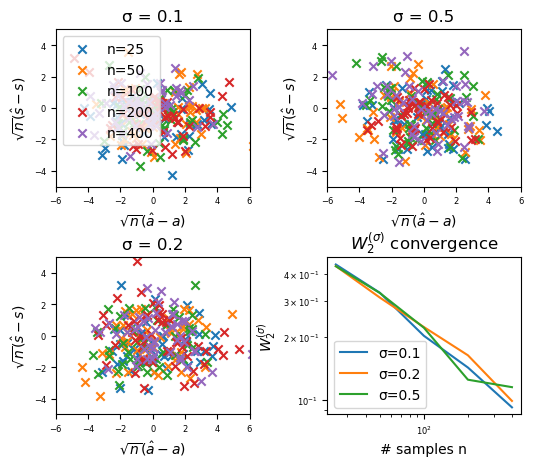

In [29]:
fig, axs = plt.subplots(2,2, figsize=(6,5))

for (i,σ) in enumerate(sigmas)
    for (j,n) in enumerate(sample_sizes)
        normalized_a_errs = sqrt(n)*(a_estimates[i,j,:] .- true_a)
        normalized_s_errs = sqrt(n)*(s_estimates[i,j,:] .- true_s)
        axs[i].scatter(normalized_a_errs, normalized_s_errs, marker="x", label="n=$(n)")
    end
    axs[i].set_xlabel(L"\sqrt{n}(\hat{a} - a)")
    axs[i].set_ylabel(L"\sqrt{n}(\hat{s} - s)")
    axs[i].set_xlim([-6,6])
    axs[i].set_ylim([-5,5])
    axs[i].set_title("σ = $(σ)")
    axs[i].tick_params(axis="both", which="major", labelsize=6)
    axs[i].tick_params(axis="both", which="minor", labelsize=6)
end
axs[1].legend()

for (i,σ) in enumerate(sigmas)
    mean_sw2_err = mean(sw2_errs[i,:,:], dims=2)
    axs[end].plot(vec(sample_sizes), mean_sw2_err,label="σ=$(σ)")
    axs[end].set_xscale("log")
    axs[end].set_yscale("log")
    axs[end].set_xlabel("# samples n")
    axs[end].set_ylabel(L"W_2^{(\sigma)}")
    axs[end].tick_params(axis="both", which="major", labelsize=6)
    axs[end].tick_params(axis="both", which="minor", labelsize=6)
end
axs[end].legend()
axs[end].set_title(L"$W_2^{(\sigma)}$ convergence")
subplots_adjust(wspace=0.4, hspace=0.45)